<a href="https://colab.research.google.com/github/haseebkhan9081/LViT_Vision_Transformer/blob/main/LViT_Vision_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
#os.chdir('D:/Traffic_Sign_Recognition')
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [6]:
pip install tensorflow==2.13.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 20.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:
      

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.17.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

ModuleNotFoundError: No module named 'keras.src.engine'

In [ ]:
data = []
labels = []
# We have 43 Classes
# classes = ['Bengincases', 'Malignantcases', 'Normalcases']
classes = 3
cur_path = '/content/drive/MyDrive/Sem7/ResearchPaper'


In [ ]:
cur_path

'/content/drive/MyDrive/Sem7/ResearchPaper'

In [ ]:
# 0 benign cancer images
# 1 malignant cancer images
# 2 normal images

for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    print(path)
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

/content/drive/MyDrive/Sem7/ResearchPaper/train/0
/content/drive/MyDrive/Sem7/ResearchPaper/train/1
/content/drive/MyDrive/Sem7/ResearchPaper/train/2


In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
print(data.shape, labels.shape)

(1113, 30, 30, 3) (1113,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(890, 30, 30, 3) (223, 30, 30, 3) (890,) (223,)


(-0.5, 29.5, 29.5, -0.5)

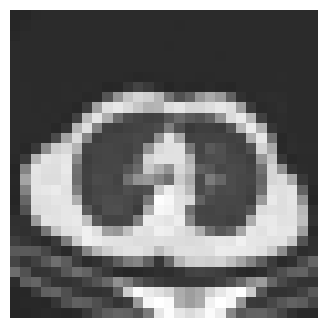

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = X_train[np.random.choice(range(X_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

In [ ]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(72, 72),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(X_train)

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 120
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 8       #6,7,8,9,10,11,12
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


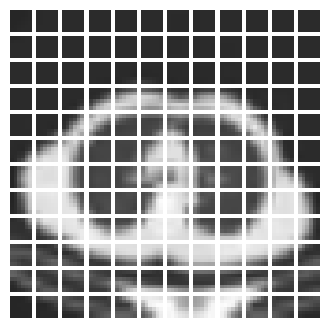

In [ ]:
resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
input_shape = (30, 30, 3)

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

# vit_classifier = create_vit_classifier()


In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/120
4/4 [==============================] - 39s 1s/step - loss: 11.0857 - accuracy: 0.4220 - top-5-accuracy: 1.0000 - val_loss: 0.9637 - val_accuracy: 0.4719 - val_top-5-accuracy: 1.0000
Epoch 2/120
4/4 [==============================] - 3s 853ms/step - loss: 2.0051 - accuracy: 0.4657 - top-5-accuracy: 1.0000 - val_loss: 2.7794 - val_accuracy: 0.4944 - val_top-5-accuracy: 1.0000
Epoch 3/120
4/4 [==============================] - 2s 453ms/step - loss: 2.8015 - accuracy: 0.4494 - top-5-accuracy: 1.0000 - val_loss: 1.3635 - val_accuracy: 0.4270 - val_top-5-accuracy: 1.0000
Epoch 4/120
4/4 [==============================] - 2s 462ms/step - loss: 1.5900 - accuracy: 0.4607 - top-5-accuracy: 1.0000 - val_loss: 1.1417 - val_accuracy: 0.4719 - val_top-5-accuracy: 1.0000
Epoch 5/120
4/4 [==============================] - 2s 469ms/step - loss: 1.4459 - accuracy: 0.5593 - top-5-accuracy: 1.0000 - val_loss: 0.9380 - val_accuracy: 0.4607 - val_top-5-accuracy: 1.0000
Epoch 6/120
4/4 [=========

In [1]:
#history.history ??
history.history.keys()
print(history.history['accuracy'])

NameError: name 'history' is not defined

In [ ]:
history.history

{'loss': [11.085711479187012,
  2.0051403045654297,
  2.8015167713165283,
  1.590004563331604,
  1.4459033012390137,
  1.2243527173995972,
  1.0918257236480713,
  1.0627330541610718,
  1.0072472095489502,
  0.975839376449585,
  0.90733802318573,
  0.91366046667099,
  0.9521039128303528,
  0.8913710713386536,
  0.887251615524292,
  0.8958181142807007,
  0.8863063454627991,
  0.834876298904419,
  0.8927621245384216,
  0.8719262480735779,
  0.8725594878196716,
  0.8897351622581482,
  0.8106294870376587,
  0.8314871788024902,
  0.8600277900695801,
  0.7842874526977539,
  0.7534764409065247,
  0.8037607073783875,
  0.7756794095039368,
  0.7762767672538757,
  0.7597200870513916,
  0.7783393859863281,
  0.7663858532905579,
  0.8015792965888977,
  0.7780395150184631,
  0.7489457130432129,
  0.7591185569763184,
  0.7376171946525574,
  0.7033003568649292,
  0.7029233574867249,
  0.7023714780807495,
  0.6981767416000366,
  0.6727758049964905,
  0.6672831177711487,
  0.6754702925682068,
  0.678014

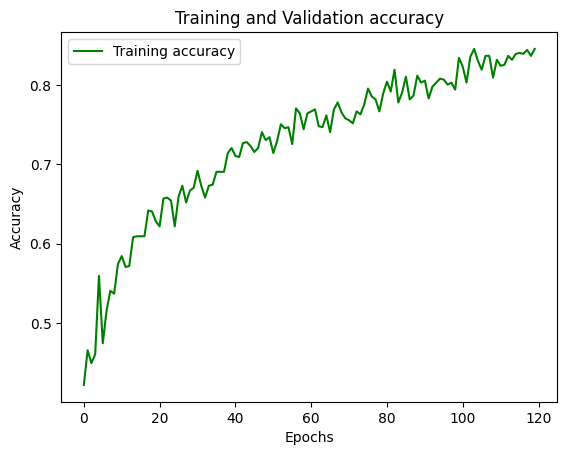

epochs:  120  heads:  8


In [ ]:
import matplotlib.pyplot as plt

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,num_epochs)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
#plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print('epochs: ',num_epochs,' heads: ',num_heads)

epochs:  120  heads:  8


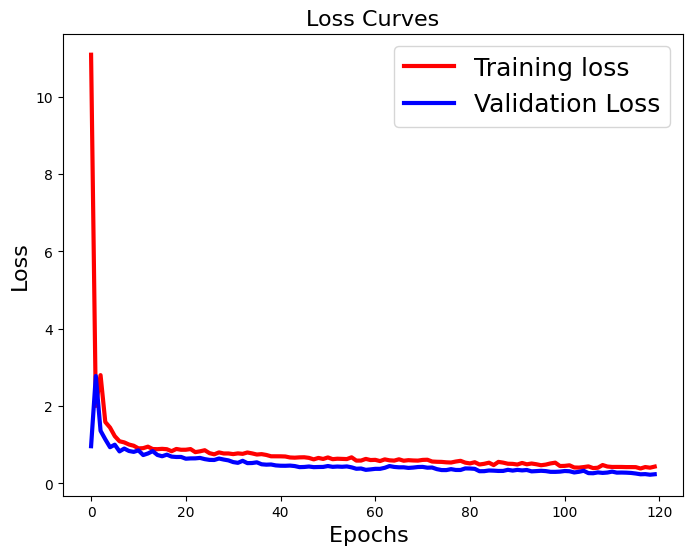

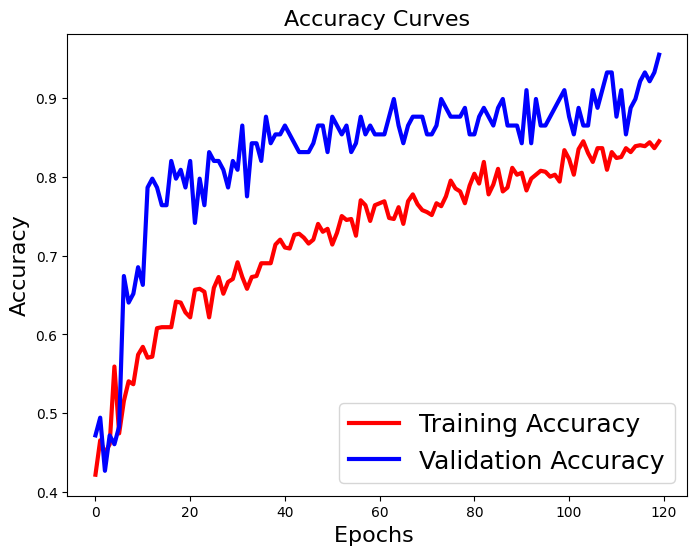

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

print('epochs: ',num_epochs,' heads: ',num_heads)

In [ ]:
%ls

drive/  sample_data/


In [ ]:
vit_classifier.save_weights('drive/MyDrive/Sem7/ResearchPaper/savedmodel/vit_classifier')


In [ ]:
vit_classifier.save('vit_model')

In [ ]:
vit_model = create_vit_classifier()
vit_model.load_weights('drive/MyDrive/Sem7/ResearchPaper/savedmodel/vit_classifier.h5')


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(y_test)
x_outputs = vit_model.predict(data)


[2 1 1 2 2 1 1 1 1 1 1 1 2 2 2 2 2 1 1 2 1 0 2 2 2 2 2 1 2 0 1 2 2 2 2 0 2
 1 2 2 1 1 1 2 1 1 1 2 1 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 0 1 1 1 2 2 1 2 0
 1 2 0 2 1 1 1 2 1 1 2 2 2 2 2 1 2 1 1 2 2 0 1 2 2 0 0 2 1 0 2 1 1 2 1 1 1
 2 2 0 1 1 2 1 2 1 2 2 1 1 2 2 1 2 1 0 2 1 1 1 2 0 1 0 2 1 1 2 2 2 1 1 1 1
 2 2 0 1 1 2 2 1 2 0 1 1 1 2 2 1 1 2 2 2 0 1 1 0 1 1 2 2 1 2 1 1 1 1 2 2 1
 2 1 1 1 1 2 2 1 2 0 2 0 0 1 1 0 2 2 2 2 1 1 2 1 1 2 2 1 1 2 2 2 2 2 2 2 1
 2]
35/35 [==============================] - 2s 32ms/step


In [ ]:
X_test

array([[[[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [43, 43, 43],
         [40, 40, 40],
         [38, 38, 38]],

        [[38, 38, 38],
         [38, 38, 38],
         [42, 42, 42],
         ...,
         [43, 43, 43],
         [43, 43, 43],
         [40, 40, 40]],

        [[38, 38, 38],
         [41, 41, 41],
         [43, 43, 43],
         ...,
         [43, 43, 43],
         [43, 43, 43],
         [43, 43, 43]],

        ...,

        [[38, 38, 38],
         [40, 40, 40],
         [40, 40, 40],
         ...,
         [40, 40, 40],
         [41, 41, 41],
         [43, 43, 43]],

        [[38, 38, 38],
         [38, 38, 38],
         [41, 41, 41],
         ...,
         [43, 43, 43],
         [43, 43, 43],
         [40, 40, 40]],

        [[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [43, 43, 43],
         [40, 40, 40],
         [38, 38, 38]]],


       [[[38, 38, 38],
         [40, 40, 40],
         [42, 

In [ ]:
import seaborn as sns


In [ ]:
predicted_values = []

for i in x_outputs:
    predicted_values.append(i.argmax(axis=0))



In [ ]:
print(y_test.shape, x_outputs.shape)

print(y_test)
print(x_outputs)

(223,) (1113, 3)
[2 1 1 2 2 1 1 1 1 1 1 1 2 2 2 2 2 1 1 2 1 0 2 2 2 2 2 1 2 0 1 2 2 2 2 0 2
 1 2 2 1 1 1 2 1 1 1 2 1 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 0 1 1 1 2 2 1 2 0
 1 2 0 2 1 1 1 2 1 1 2 2 2 2 2 1 2 1 1 2 2 0 1 2 2 0 0 2 1 0 2 1 1 2 1 1 1
 2 2 0 1 1 2 1 2 1 2 2 1 1 2 2 1 2 1 0 2 1 1 1 2 0 1 0 2 1 1 2 2 2 1 1 1 1
 2 2 0 1 1 2 2 1 2 0 1 1 1 2 2 1 1 2 2 2 0 1 1 0 1 1 2 2 1 2 1 1 1 1 2 2 1
 2 1 1 1 1 2 2 1 2 0 2 0 0 1 1 0 2 2 2 2 1 1 2 1 1 2 2 1 1 2 2 2 2 2 2 2 1
 2]
[[ 0.18934675 -0.28388667 -0.01533441]
 [ 0.1258638  -0.41035515  0.17000005]
 [ 3.1783988  -1.5051372  -1.7302843 ]
 ...
 [ 0.40944925 -2.0772438   2.9220755 ]
 [-2.9075978  -0.6803424   8.099008  ]
 [ 0.6030007  -0.54321796  0.40101647]]


[[ 61   7  52]
 [  2 554   5]
 [ 17   9 406]]


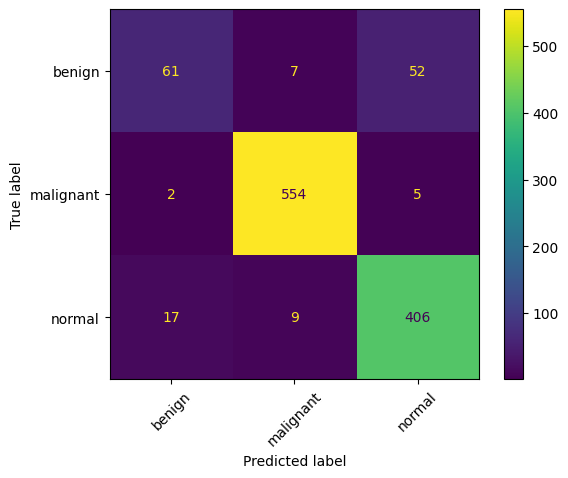

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

# __label = ['benign', 'malignant', 'normal']

cm = confusion_matrix(labels, predicted_values)

print(cm)

disp = ConfusionMatrixDisplay(cm,display_labels=['benign', 'malignant', 'normal'])
disp.plot(xticks_rotation=45)

In [ ]:
print(cm)

[[ 61   7  52]
 [  2 554   5]
 [ 17   9 406]]


In [ ]:
acc_matrix = []
for i in cm:
    tmp = []
    for j in i:
        tmp.append(j/sum(i))
    acc_matrix.append(tmp)

In [ ]:
print(np.matrix(acc_matrix))

[[0.50833333 0.05833333 0.43333333]
 [0.00356506 0.98752228 0.00891266]
 [0.03935185 0.02083333 0.93981481]]


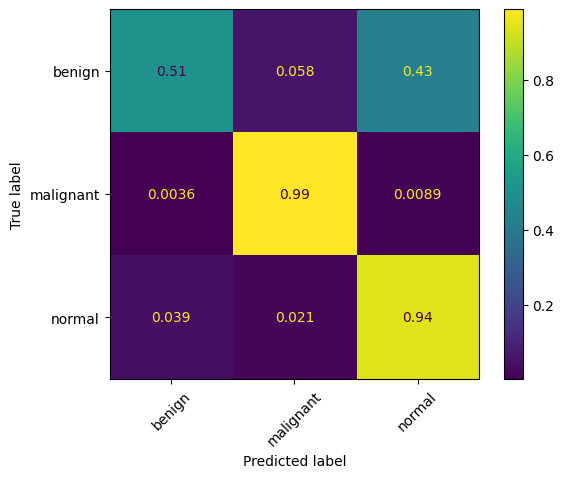

In [ ]:
# disp = ConfusionMatrixDisplay()
disp = ConfusionMatrixDisplay(np.matrix(acc_matrix),display_labels=['benign', 'malignant', 'normal'])

disp.plot(xticks_rotation=45)